# EDA with Neflix Movies and TV Shows
## Introduction:
* This is an exploratory data analysis of the Netflix Movies and TV Shows [Dataset](https://www.kaggle.com/datasets/shivamb/netflix-shows).
* This dataset contains all key attributes, and features of Movies and TV shows avialable on Netflix.
* Data Source : Kaggle.
* Dataset is in CSV format.

In this analysis, I focus on major attributes to see relationship between common variable such as;
* release year and type of show.
* date added and type of show.
* day of month of date added and type of show.
* Duration and number of shows falls in that duration.

### I also answer question such as;
* How many Movies and TV Shows are there?
* Which country has given maximum shows?
* Which is most available genre present?
* On which day of week the show is added on Netflix?

## Import Libraries and Data

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import matplotlib
import itertools
import plotly.express as px
%matplotlib inline

## Load and Preview Data

In [3]:
pwd = os.getcwd()
filepath = pwd + "\\netflix_titles.csv"
netflix_df = pd.read_csv(filepath)

## Understanding Data

In [4]:
# What's the shape of data
netflix_df.shape

(8807, 12)

In [5]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
# Columns Name
list(netflix_df.columns)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [7]:
# Data Type of each Column
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
# No. of non-Null values in each column
netflix_df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [9]:
# No. of Unique values in each column
netflix_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [10]:
# Let's check out basic statistics
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
netflix_df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [11]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:
# No. of Null values in each column
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
# Check duration for each TV Show
netflix_df[netflix_df["type"] == "TV Show"].duration.value_counts()

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

## Data Needed to clean
* Dataset have 8807 observations and 12 columns.
* Datatype of date_added is in int needed to change into **datetime**
* Duration for Movies is in minutes and TV Shows is in seasons.
* Columns having **NULL** values-
  1. director - 2634
  2. cast - 825
  3. country - 831
  4. date_added - 10
  5. rating - 4 
  6. duration - 3
 

## Clean Data

#### Data type:
* Data type of 'date_added' column should be changed from string to *datetime*.
* Change the data type of 'type' column  to *category*.

### Change Data type

In [14]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [15]:
netflix_df['type'] = netflix_df['type'].astype('category')
netflix_df.dtypes

show_id                 object
type                  category
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

### Taking care of Null Values
Replace Null values of columns director, cast, country and rating with *missing*.

In [16]:
netfilx_df = netflix_df.fillna({"director":"missing","cast":"missing","country":"missing","rating":"missing"}, inplace = True)
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,missing,missing,missing,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [17]:
netflix_df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

- Check data for missing values of duration columm

In [18]:
netflix_df[netflix_df.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


* Missing values of duration column are present in the rating column.
* Overwrite the duration column by rating column for missing values and replace rating values with *missing* for same rows.
* i.e. There are total **7 NULL** values in rating column instead of 4.

In [19]:
netflix_df[netflix_df['director'] == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [20]:
netflix_df.loc[netflix_df['director'] == 'Louis C.K.', 'duration'] = netflix_df['rating']
netflix_df[netflix_df['director'] == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [21]:
netflix_df.loc[netflix_df['director'] == 'Louis C.K.', 'rating'] = 'missing'
netflix_df[netflix_df['director'] == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,missing,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,missing,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,missing,66 min,Movies,The comic puts his trademark hilarious/thought...


In [22]:
netflix_df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [23]:
netflix_df.nunique()

show_id         8807
type               2
title           8807
director        4529
cast            7693
country          749
date_added      1714
release_year      74
rating            15
duration         220
listed_in        514
description     8775
dtype: int64

In [24]:
list(netflix_df.rating.unique())

['PG-13',
 'TV-MA',
 'PG',
 'TV-14',
 'TV-PG',
 'TV-Y',
 'TV-Y7',
 'R',
 'TV-G',
 'G',
 'NC-17',
 'missing',
 'NR',
 'TV-Y7-FV',
 'UR']

In [25]:
netflix_df.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
missing        7
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

## Analyzing and Visualizing Data

- Visualize data for the release year of shows.
- Check if there is any pattern

In [30]:
px.histogram(netflix_df, x='release_year', color='type')

- Extract year from date_added column and make different column.
- Plot the histogram for extracted year of date_added column.

In [31]:
netflix_df["date_added_year"] = netflix_df['date_added'].dt.year

In [32]:
netflix_df.date_added_year.value_counts()

2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: date_added_year, dtype: int64

In [33]:
px.histogram(netflix_df, x = 'date_added_year', color='type')

- Extract month from date_added column and make different column.
- Plot the histogram for extracted month of date_added column.

In [34]:
netflix_df['date_added_month'] = netflix_df['date_added'].dt.month

In [35]:
netflix_df.date_added_month.value_counts()

7.0     827
12.0    813
9.0     770
4.0     764
10.0    760
8.0     755
3.0     742
1.0     738
6.0     728
11.0    705
5.0     632
2.0     563
Name: date_added_month, dtype: int64

In [36]:
px.histogram(netflix_df, x = 'date_added_month', color='type')

In [37]:
netflix_df['date_added_day'] = netflix_df['date_added'].dt.day
netflix_df.date_added_day.value_counts()

1.0     2212
15.0     687
2.0      325
16.0     289
31.0     274
20.0     249
19.0     243
5.0      231
22.0     230
10.0     214
30.0     210
6.0      210
18.0     207
26.0     206
8.0      201
14.0     198
25.0     197
27.0     195
7.0      194
21.0     193
28.0     190
23.0     184
12.0     181
17.0     180
4.0      175
13.0     175
24.0     159
3.0      151
11.0     149
9.0      147
29.0     141
Name: date_added_day, dtype: int64

- Extract day from date_added column and make different column.
- Plot the histogram for extracted day of date_added column and check whether there is any pattern.

In [38]:
px.histogram(netflix_df, x='date_added_day', color='type')

- Extract week day from date_added column and make different column.
- Plot the histogram for extracted week day of date_added column for pattern if there any.

In [39]:
netflix_df['day_of_week'] = netflix_df['date_added'].dt.day_name()
netflix_df.day_of_week.value_counts()

Friday       2498
Thursday     1396
Wednesday    1288
Tuesday      1197
Monday        851
Saturday      816
Sunday        751
Name: day_of_week, dtype: int64

In [40]:
px.histogram(netflix_df, x='day_of_week', color='type')

- Plot Pie chart for type column to see the distribution of Movies and TV Shows.

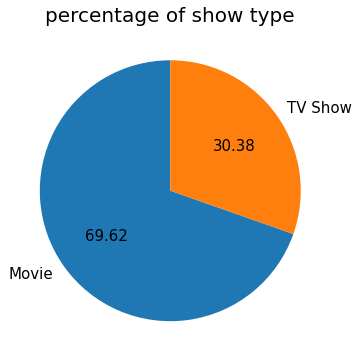

In [41]:
plt.figure(figsize=(6,6), facecolor='white')
plt.title('percentage of show type', fontsize = 20)
plt.pie(netflix_df.groupby('type').size(),labels=set(netflix_df.type),textprops={"fontsize":15}, startangle = 90, autopct='%.2f');

- Plot histogram for rating column.

In [42]:
px.histogram(netflix_df, x='rating', color='type')

- As the duration for Movies is in minutes and TV Shows is in Seasons, hence create different dataframes.
- Create different dataframe for Movie value of type column.
- Delete columns which are not required.
- Plot histogram for duration column.

In [43]:
movie_df = netflix_df[netflix_df["type"] == "Movie"]
movie_df = movie_df.drop(movie_df.columns[[0,10, 11, 12, 13, 14, 15]], axis=1)
movie_df

,type,title,director,cast,country,date_added,release_year,rating,duration
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90 min
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missing,2021-09-24,2021,PG,91 min
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min
...,...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min


In [45]:
movie_df[['duration_1','duration_2']] = movie_df['duration'].str.split(' ', expand=True)
movie_df['duration_1'] = movie_df['duration_1'].astype('int')

In [46]:
px.histogram(movie_df, x='duration_1')

- Create different dataframe for TV Shows.
- Delete columns which are not required.
- Plot histogram for duration column.

In [47]:
tv_show_df = netflix_df[netflix_df["type"] == "TV Show"]
tv_show_df = tv_show_df.drop(tv_show_df.columns[[0,10, 11, 12, 13, 14, 15]], axis=1)
tv_show_df

,type,title,director,cast,country,date_added,release_year,rating,duration
1,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season
3,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,1 Season
4,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021-09-24,2021,TV-MA,1 Season
...,...,...,...,...,...,...,...,...,...
8795,TV Show,Yu-Gi-Oh! Arc-V,missing,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons
8796,TV Show,Yunus Emre,missing,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons
8797,TV Show,Zak Storm,missing,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons
8800,TV Show,Zindagi Gulzar Hai,missing,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season


In [48]:
tv_show_df[['duration_1','duration_2']] = tv_show_df['duration'].str.split(' ', expand=True)
tv_show_df['duration_1'] = tv_show_df['duration_1'].astype('int64')
tv_show_df.dtypes

type                  category
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
duration_1               int64
duration_2              object
dtype: object

In [49]:
px.histogram(tv_show_df, x='duration_1')

- Create list of genre by splitting the values as one observation has more one genre.
- Plot the countplot for genre.

In [50]:
list_of_list_of_genre = list(netflix_df["listed_in"].map(lambda x: x.split(", ")))
list_of_genre = list(itertools.chain.from_iterable(list_of_list_of_genre))
list_of_genre

['Documentaries',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Crime TV Shows',
 'International TV Shows',
 'TV Action & Adventure',
 'Docuseries',
 'Reality TV',
 'International TV Shows',
 'Romantic TV Shows',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'Children & Family Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'British TV Shows',
 'Reality TV',
 'Comedies',
 'Dramas',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'Crime TV Shows',
 'International TV Shows',
 'TV Action & Adventure',
 'Dramas',
 'International Movies',
 'Children & Family Movies',
 'Comedies',
 'British TV Shows',
 'Crime TV Shows',
 'Docuseries',
 'TV Comedies',
 'TV Dramas',
 'Documentaries',
 'International Movies',
 'Crime TV Shows',
 'Spanish-Language TV Shows',
 'TV Dramas',
 'Thrillers',
 'International TV Shows',
 'Spanish-Language TV Shows',
 'TV Action & Adventure',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'In

In [51]:
array_of_genre = np.array(list_of_genre)
genre = np.unique(array_of_genre)
len(list(genre))

42

In [52]:
genre_dict = {i:list_of_genre.count(i) for i in list_of_genre}
sorted_genre=pd.Series(genre_dict).sort_values(ascending=False)
sorted_genre

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

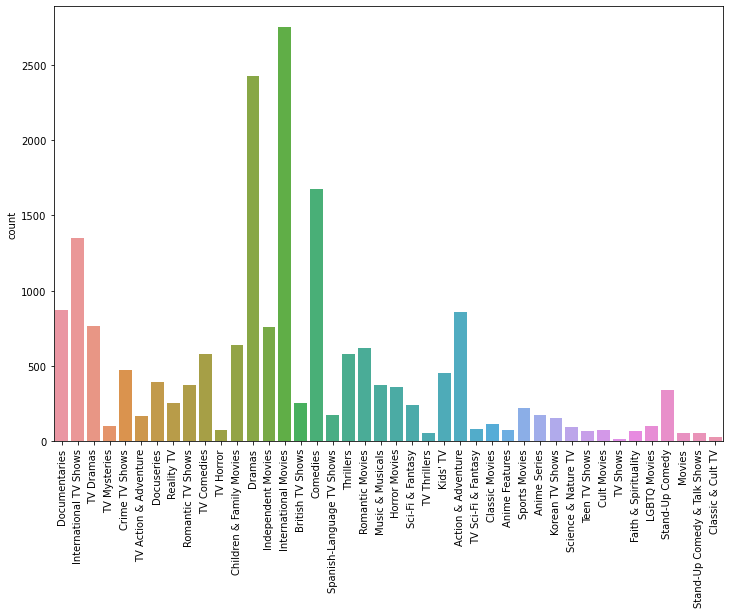

In [53]:

plt.figure(figsize=(12,8))
plt.xticks(rotation = 'vertical')
sns.countplot(x = list_of_genre);

### Shows Produced by Single Country

In [56]:
netflix_df["no_of_country"] = netflix_df["country"].map(lambda x: len(x.split(",")))
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,date_added_month,date_added_day,day_of_week,no_of_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,25.0,Saturday,1
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,24.0,Friday,1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,24.0,Friday,1
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,24.0,Friday,1
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,24.0,Friday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0,20.0,Wednesday,1
8803,s8804,TV Show,Zombie Dumb,missing,missing,missing,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0,1.0,Monday,1
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0,1.0,Friday,1
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0,11.0,Saturday,1


In [57]:
netflix_df['no_of_country'].value_counts()

1     7487
2      873
3      273
4      114
5       37
6       14
7        5
8        2
12       1
10       1
Name: no_of_country, dtype: int64

- Create countplot for countries which have only one country in it.

In [58]:
netflix_df[(netflix_df['no_of_country'] == 1)].country.value_counts()


United States     2818
India              972
missing            831
United Kingdom     419
Japan              245
                  ... 
Luxembourg           1
Zimbabwe             1
Namibia              1
Mauritius            1
Cyprus               1
Name: country, Length: 74, dtype: int64

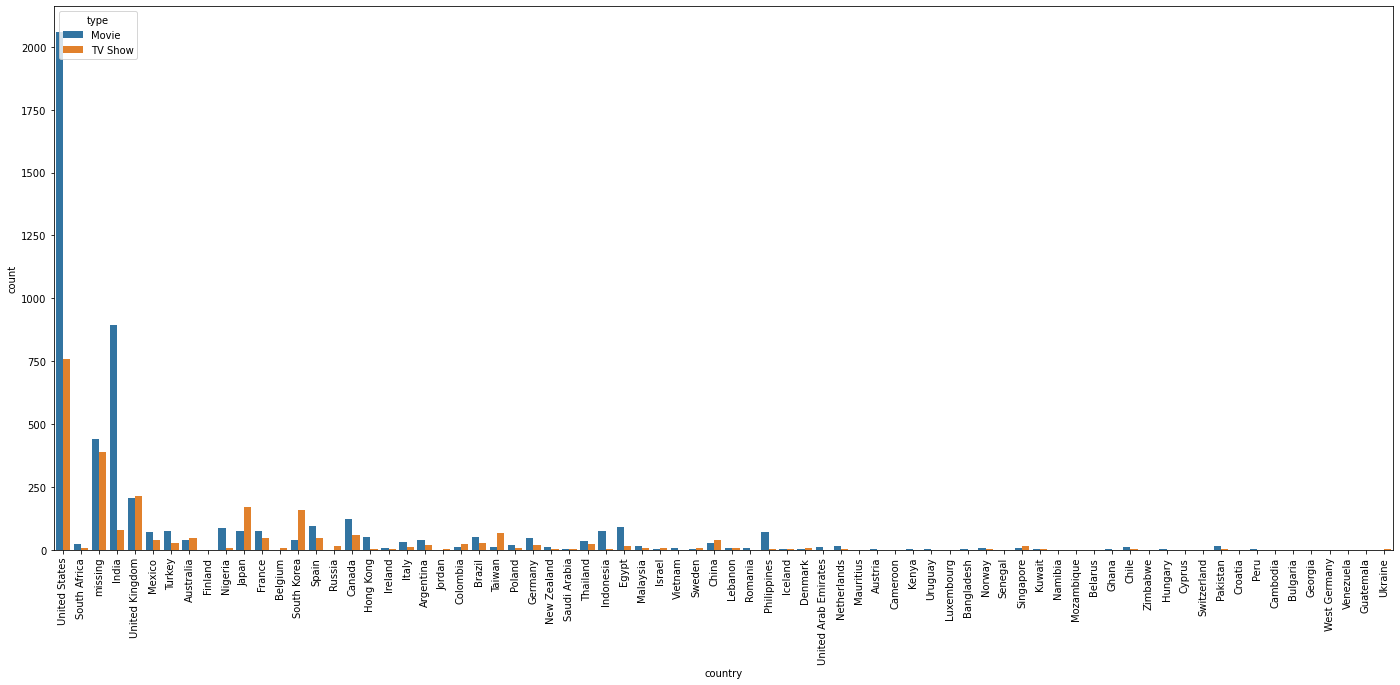

In [66]:
plt.figure(figsize=(24,10))
plt.xticks(rotation = 'vertical')
sns.countplot(x = netflix_df[(netflix_df['no_of_country'] == 1)].country, data = netflix_df, hue = 'type');
#px.histogram(netflix_df, x = netflix_df[(netflix_df['no_of_country'] == 1)].country)

### Shows Produce all countries

- Copy the dataframe for plotting the histogram for each country.
- Use Split function to seperate and create column for each country as country column has more than one value. 

In [67]:
country_count = netflix_df.copy()
country_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,date_added_month,date_added_day,day_of_week,no_of_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,25.0,Saturday,1
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,24.0,Friday,1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,24.0,Friday,1
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,24.0,Friday,1
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,24.0,Friday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0,20.0,Wednesday,1
8803,s8804,TV Show,Zombie Dumb,missing,missing,missing,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0,1.0,Monday,1
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0,1.0,Friday,1
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0,11.0,Saturday,1


In [68]:
country_count = country_count.drop(country_count.columns[[12, 13, 14, 15, 16]], axis=1)
country_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,missing,missing,missing,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [69]:
country_count = pd.concat([country_count, netflix_df['country'].str.split(', ', expand=True)], axis=1)
country_count = country_count.melt(id_vars= ['type','title'], value_vars=range(12), value_name= 'Country')
country_count = country_count[country_count['Country'].notna()]
country_count['Country'] = country_count['Country'].str.replace(',', '')
country_count

,type,title,variable,Country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
2,TV Show,Ganglands,0,missing
3,TV Show,Jailbirds New Orleans,0,missing
4,TV Show,Kota Factory,0,India
...,...,...,...,...
78859,Movie,The Look of Silence,8,Germany
85496,Movie,Barbecue,9,Sweden
87666,Movie,The Look of Silence,9,Netherlands
94303,Movie,Barbecue,10,United States


In [70]:
px.histogram(country_count, 'Country', color='type')

## Coclusion:
* Movies and TV Shows release from 2016 to 2020 are more.
* Maximum no. of Movies and TV Shows are added on netflix on 1 st day of month than 15 th and on Friday than Thursday.
* 70 % are movies and 30% are TV Shows.
* Movies from 80 minutes to 120 minutes duration are more and TV Shows for Season 1.
* Apart from International Movies and International TV Shows, Drama and Comedy genre are more in number.
* Shows produced by United States then India are maximum.
* South Korea have more TV Shows compared to the Movies.